#Installing Dataset

In [ ]:
!pip install opendatasets
!pip install pandas

In [ ]:
import opendatasets as od
import pandas

od.download(
    "https://www.kaggle.com/datasets/tongpython/cat-and-dog")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: yonatanyi
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog


100%|██████████| 218M/218M [00:02<00:00, 106MB/s]


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [ ]:
import os
import random
import numpy as np

seed_value = 42
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

keras.utils.image_dataset_from_directory function from keras: https://keras.io/api/data_loading/image/

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/cat-and-dog/training_set/training_set',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 8005 files belonging to 2 classes.


In [ ]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/cat-and-dog/test_set/test_set',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 2023 files belonging to 2 classes.


The data is stored in numpy array with values from 0 to 255. We need to nomalize it from 0 to 1.

In [ ]:
def process(image, label):
  image=tf.cast(image/255, tf.float32)
  return image, label

In [ ]:
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

# Model function


In [ ]:
def get_model():
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3,3), padding = 'valid', activation = 'relu', input_shape = (256,256,3)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))

  model.add(Conv2D(64, kernel_size=(3,3), padding = 'valid', activation = 'relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))

  model.add(Conv2D(128, kernel_size=(3,3), padding = 'valid', activation = 'relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2), strides = 2, padding = 'valid'))

  model.add(Flatten())

  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.1))
  model.add(Dense(1, activation='sigmoid'))

  return model

#Model with Adam

In [ ]:
model_Adam = get_model()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_Adam.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
from tensorflow.keras.metrics import Precision, Recall

In [ ]:
model_Adam.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', Precision, Recall])

In [ ]:
history_Adam = model_Adam.fit(train_ds, epochs=20, validation_data=validation_ds)

Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 44s 114ms/step - accuracy: 0.5481 - loss: 4.4865 - precision: 0.5544 - recall: 0.5635 - val_accuracy: 0.5512 - val_loss: 0.7407 - val_precision: 0.5778 - val_recall: 0.3814
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 24s 94ms/step - accuracy: 0.5830 - loss: 0.7811 - precision: 0.5881 - recall: 0.5882 - val_accuracy: 0.6387 - val_loss: 0.6444 - val_precision: 0.7707 - val_recall: 0.3953
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 37s 80ms/step - accuracy: 0.6622 - loss: 0.6159 - precision: 0.6844 - recall: 0.6203 - val_accuracy: 0.6530 - val_loss: 0.6978 - val_precision: 0.6189 - val_recall: 0.7974
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - accuracy: 0.7090 - loss: 0.5890 - precision: 0.7262 - recall: 0.6783 - val_accuracy: 0.5734 - val_loss: 0.7156 - val_precision: 0.7729 - val_recall: 0.2085
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - accuracy: 0.7159 - loss: 0.5635 - precision: 0.7354 - recall: 0.6864 - val_accuracy: 0.7509 - v

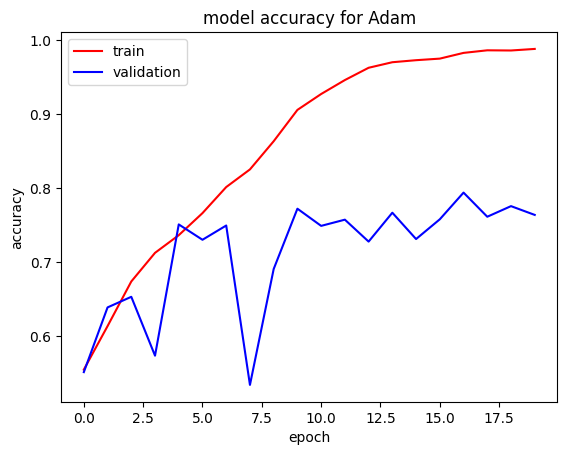

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_Adam.history['accuracy'], color='red', label='train')
plt.plot(history_Adam.history['val_accuracy'], color='blue', label='validation')
plt.title('model accuracy for Adam')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

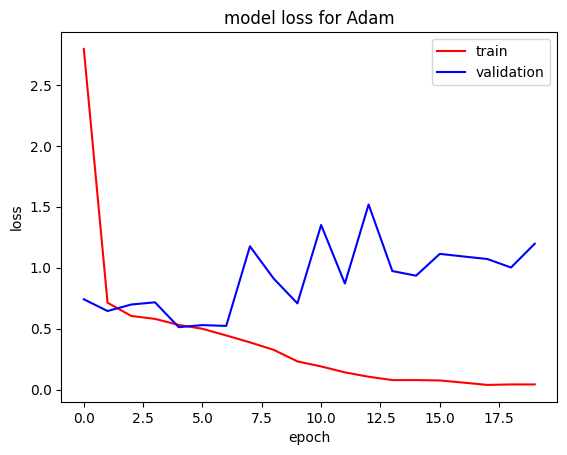

In [ ]:
plt.plot(history_Adam.history['loss'], color='red', label='train')
plt.plot(history_Adam.history['val_loss'], color='blue', label='validation')
plt.title('model loss for Adam')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

#Model with SGD

In [ ]:
model_SGD = get_model()

In [ ]:
model_SGD.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy', Precision, Recall])

In [ ]:
history_SGD = model_SGD.fit(train_ds, epochs=20, validation_data=validation_ds)

Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 29s 97ms/step - accuracy: 0.6097 - loss: 0.7465 - precision_1: 0.6137 - recall_1: 0.6194 - val_accuracy: 0.4918 - val_loss: 0.8252 - val_precision_1: 0.4846 - val_recall_1: 0.2480
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 36s 89ms/step - accuracy: 0.7268 - loss: 0.5351 - precision_1: 0.7249 - recall_1: 0.7420 - val_accuracy: 0.6752 - val_loss: 0.5996 - val_precision_1: 0.7718 - val_recall_1: 0.4980
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.7802 - loss: 0.4567 - precision_1: 0.7852 - recall_1: 0.7809 - val_accuracy: 0.4998 - val_loss: 4.0410 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 90ms/step - accuracy: 0.8406 - loss: 0.3724 - precision_1: 0.8435 - recall_1: 0.8391 - val_accuracy: 0.7138 - val_loss: 0.6091 - val_precision_1: 0.6714 - val_recall_1: 0.8379
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 39s 80ms/step - accuracy: 0.9017 - loss: 0.2327 - precision_1: 0.8998 - 

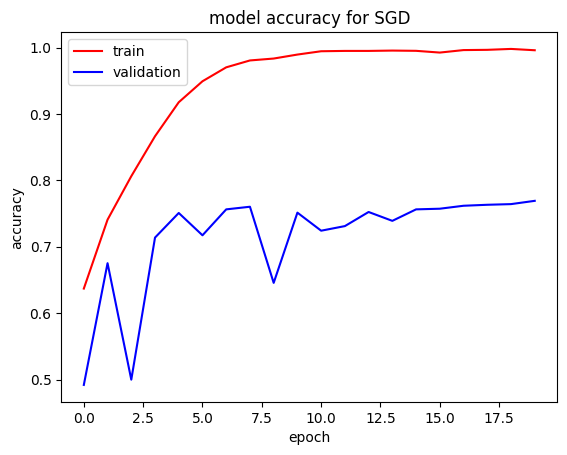

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_SGD.history['accuracy'], color='red', label='train')
plt.plot(history_SGD.history['val_accuracy'], color='blue', label='validation')
plt.title('model accuracy for SGD')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

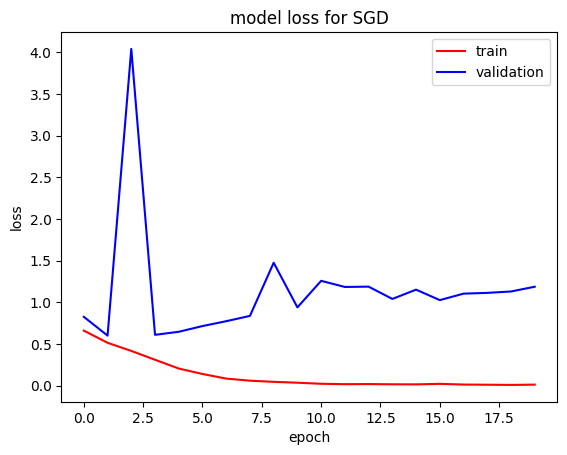

In [ ]:
plt.plot(history_SGD.history['loss'], color='red', label='train')
plt.plot(history_SGD.history['val_loss'], color='blue', label='validation')
plt.title('model loss for SGD')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

# Model with Adagrad

In [ ]:
model_adagrad = get_model()

In [ ]:
model_adagrad.compile(optimizer='Adagrad', loss='binary_crossentropy', metrics=['accuracy', Precision, Recall])

In [ ]:
history_Adagrad = model_adagrad.fit(train_ds, epochs=20, validation_data=validation_ds)

Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 31s 104ms/step - accuracy: 0.6137 - loss: 0.6903 - precision_2: 0.6258 - recall_2: 0.5809 - val_accuracy: 0.4998 - val_loss: 1.8179 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.7742 - loss: 0.4753 - precision_2: 0.7777 - recall_2: 0.7771 - val_accuracy: 0.6298 - val_loss: 0.7996 - val_precision_2: 0.8544 - val_recall_2: 0.3132
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.8594 - loss: 0.3340 - precision_2: 0.8677 - recall_2: 0.8533 - val_accuracy: 0.7598 - val_loss: 0.5006 - val_precision_2: 0.7667 - val_recall_2: 0.7470
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - accuracy: 0.9203 - loss: 0.2123 - precision_2: 0.9251 - recall_2: 0.9168 - val_accuracy: 0.7662 - val_loss: 0.5297 - val_precision_2: 0.7640 - val_recall_2: 0.7708
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 89ms/step - accuracy: 0.9551 - loss: 0.1425 - precision_2: 0.9585 -

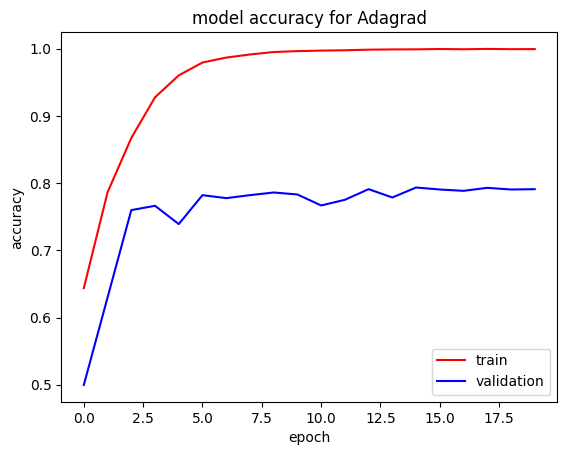

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_Adagrad.history['accuracy'], color='red', label='train')
plt.plot(history_Adagrad.history['val_accuracy'], color='blue', label='validation')
plt.title('model accuracy for Adagrad')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

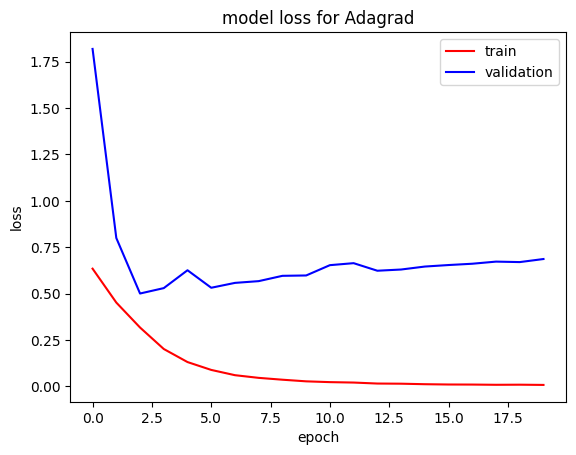

In [ ]:
plt.plot(history_Adagrad.history['loss'], color='red', label='train')
plt.plot(history_Adagrad.history['val_loss'], color='blue', label='validation')
plt.title('model loss for Adagrad')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

#Model with Nadam

In [ ]:
model_nadam = get_model()

In [ ]:
model_nadam.compile(optimizer='Nadam', loss='binary_crossentropy', metrics=['accuracy', Precision, Recall])

In [ ]:
history_Nadam = model_nadam.fit(train_ds, epochs=20, validation_data=validation_ds)

Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 34s 107ms/step - accuracy: 0.5554 - loss: 2.6314 - precision_3: 0.5603 - recall_3: 0.5621 - val_accuracy: 0.5067 - val_loss: 0.8102 - val_precision_3: 0.5233 - val_recall_3: 0.1551
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.5630 - loss: 0.6822 - precision_3: 0.7472 - recall_3: 0.2043 - val_accuracy: 0.5166 - val_loss: 0.6869 - val_precision_3: 0.6574 - val_recall_3: 0.0702
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.5853 - loss: 0.6563 - precision_3: 0.8086 - recall_3: 0.2405 - val_accuracy: 0.5803 - val_loss: 0.6671 - val_precision_3: 0.9553 - val_recall_3: 0.1690
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - accuracy: 0.6154 - loss: 0.6307 - precision_3: 0.8232 - recall_3: 0.3047 - val_accuracy: 0.6209 - val_loss: 0.7282 - val_precision_3: 0.6081 - val_recall_3: 0.6808
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 91ms/step - accuracy: 0.6396 - loss: 0.6847 - precision_3: 0.7975 - recall_

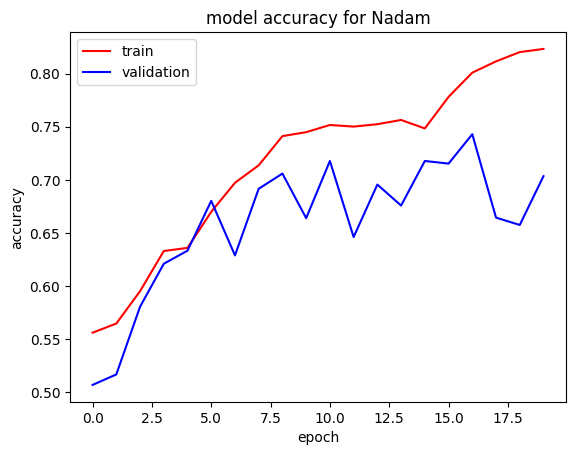

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_Nadam.history['accuracy'], color='red', label='train')
plt.plot(history_Nadam.history['val_accuracy'], color='blue', label='validation')
plt.title('model accuracy for Nadam')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

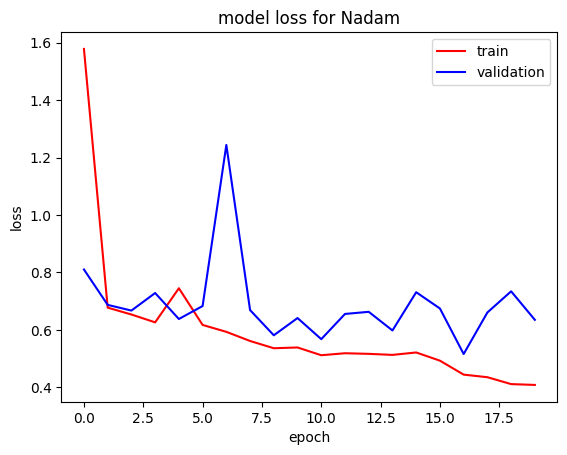

In [ ]:
plt.plot(history_Nadam.history['loss'], color='red', label='train')
plt.plot(history_Nadam.history['val_loss'], color='blue', label='validation')
plt.title('model loss for Nadam')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

#Model with RMSprop

In [ ]:
model_rmsprop = get_model()

In [ ]:
model_rmsprop.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy', Precision, Recall])
history_RMSprop = model_rmsprop.fit(train_ds, epochs=20, validation_data=validation_ds)

Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 29s 96ms/step - accuracy: 0.5454 - loss: 5.5327 - precision_4: 0.5502 - recall_4: 0.5558 - val_accuracy: 0.5017 - val_loss: 4.5716 - val_precision_4: 0.6667 - val_recall_4: 0.0079
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 34s 83ms/step - accuracy: 0.5167 - loss: 0.7847 - precision_4: 0.5310 - recall_4: 0.4248 - val_accuracy: 0.5531 - val_loss: 0.9155 - val_precision_4: 0.5443 - val_recall_4: 0.6551
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.5365 - loss: 0.7359 - precision_4: 0.5238 - recall_4: 0.9192 - val_accuracy: 0.5437 - val_loss: 0.9867 - val_precision_4: 0.5244 - val_recall_4: 0.9466
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.5818 - loss: 0.6956 - precision_4: 0.5529 - recall_4: 0.8985 - val_accuracy: 0.6426 - val_loss: 0.7760 - val_precision_4: 0.7050 - val_recall_4: 0.4911
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 40s 79ms/step - accuracy: 0.6648 - loss: 0.6129 - precision_4: 0.6458 - recall_4

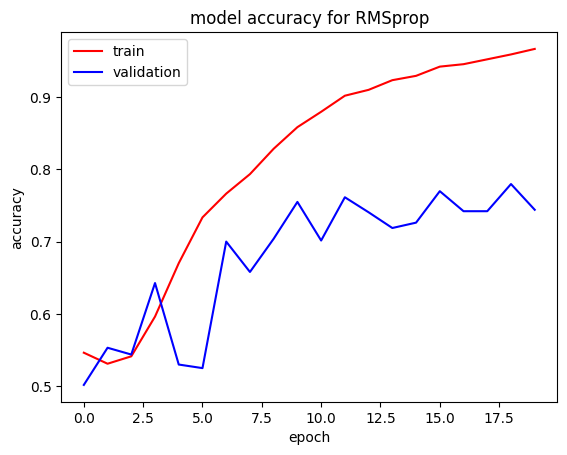

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_RMSprop.history['accuracy'], color='red', label='train')
plt.plot(history_RMSprop.history['val_accuracy'], color='blue', label='validation')
plt.title('model accuracy for RMSprop')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

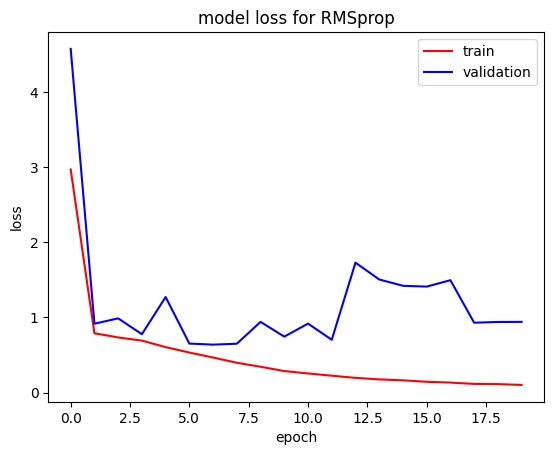

In [ ]:
plt.plot(history_RMSprop.history['loss'], color='red', label='train')
plt.plot(history_RMSprop.history['val_loss'], color='blue', label='validation')
plt.title('model loss for RMSprop')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

#Model with AdaDelta

In [ ]:
model_adadelta = get_model()

In [ ]:
model_adadelta.compile(optimizer='AdaDelta', loss='binary_crossentropy', metrics=['accuracy', Precision, Recall])
history_AdaDelta = model_adadelta.fit(train_ds, epochs=20, validation_data=validation_ds)

Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 32s 97ms/step - accuracy: 0.5392 - loss: 0.8240 - precision_5: 0.5309 - recall_5: 0.7713 - val_accuracy: 0.5200 - val_loss: 0.7111 - val_precision_5: 0.5124 - val_recall_5: 0.8340
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 32s 80ms/step - accuracy: 0.6363 - loss: 0.6389 - precision_5: 0.6317 - recall_5: 0.6739 - val_accuracy: 0.6041 - val_loss: 0.6671 - val_precision_5: 0.6667 - val_recall_5: 0.4170
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 92ms/step - accuracy: 0.6793 - loss: 0.5915 - precision_5: 0.6832 - recall_5: 0.6856 - val_accuracy: 0.6535 - val_loss: 0.6326 - val_precision_5: 0.6913 - val_recall_5: 0.5553
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 38s 81ms/step - accuracy: 0.7153 - loss: 0.5475 - precision_5: 0.7181 - recall_5: 0.7201 - val_accuracy: 0.6693 - val_loss: 0.6202 - val_precision_5: 0.6983 - val_recall_5: 0.5968
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 91ms/step - accuracy: 0.7431 - loss: 0.5164 - precision_5: 0.7488 - recall_5

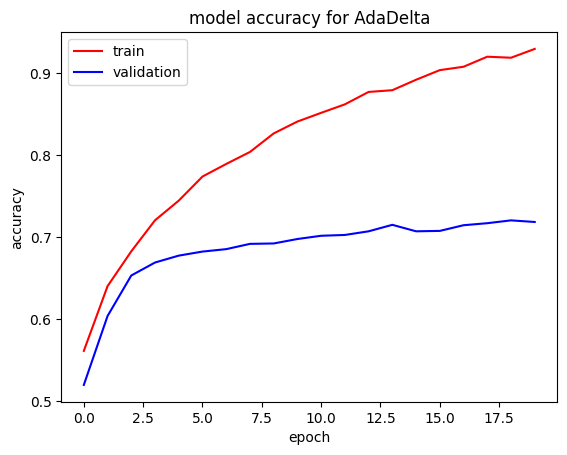

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history_AdaDelta.history['accuracy'], color='red', label='train')
plt.plot(history_AdaDelta.history['val_accuracy'], color='blue', label='validation')
plt.title('model accuracy for AdaDelta')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

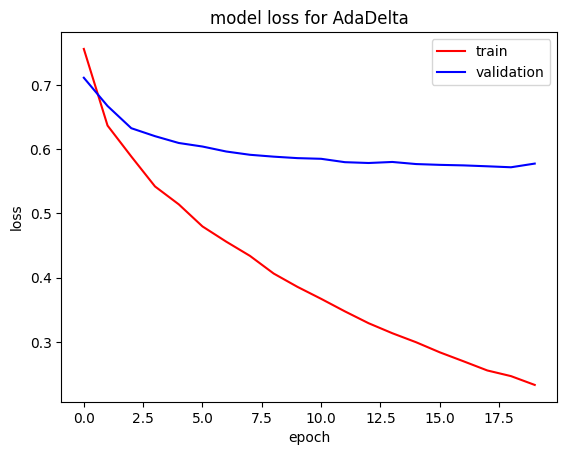

In [ ]:
plt.plot(history_AdaDelta.history['loss'], color='red', label='train')
plt.plot(history_AdaDelta.history['val_loss'], color='blue', label='validation')
plt.title('model loss for AdaDelta')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

#Different Learning rates with SGD

In [ ]:
from tensorflow.keras.optimizers import SGD

In [ ]:
model_SGD_i = get_model()
model_SGD_i.compile(optimizer=SGD(learning_rate=0.1), loss='binary_crossentropy', metrics=['accuracy'])
history_SGD = model_SGD_i.fit(train_ds, epochs=20, validation_data=validation_ds)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


251/251 ━━━━━━━━━━━━━━━━━━━━ 37s 106ms/step - accuracy: 0.5225 - loss: 3.2009 - val_accuracy: 0.4983 - val_loss: 0.6928
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.5040 - loss: 0.6936 - val_accuracy: 0.4998 - val_loss: 0.6932
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 39s 80ms/step - accuracy: 0.5047 - loss: 0.6940 - val_accuracy: 0.4988 - val_loss: 0.6927
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 77ms/step - accuracy: 0.5033 - loss: 0.6935 - val_accuracy: 0.4998 - val_loss: 0.6932
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 79ms/step - accuracy: 0.4922 - loss: 0.6917 - val_accuracy: 0.5002 - val_loss: 0.6929
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.5050 - loss: 0.6917 - val_accuracy: 0.5002 - val_loss: 0.6936
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 78ms/step - accuracy: 0.5042 - loss: 0.6927 - val_accuracy: 0.4978 - val_loss: 0.6926
Epoch 8/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.5055 - loss: 0.6913 - val_accura

In [ ]:
model_SGD_ii = get_model()
model_SGD_ii.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
history_SGD = model_SGD_ii.fit(train_ds, epochs=20, validation_data=validation_ds)

Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 26s 92ms/step - accuracy: 0.6065 - loss: 0.7769 - val_accuracy: 0.4983 - val_loss: 0.8595
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 36s 82ms/step - accuracy: 0.7281 - loss: 0.5304 - val_accuracy: 0.5932 - val_loss: 0.6891
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.7925 - loss: 0.4352 - val_accuracy: 0.6184 - val_loss: 0.8609
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 89ms/step - accuracy: 0.8542 - loss: 0.3441 - val_accuracy: 0.7425 - val_loss: 0.5721
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.9175 - loss: 0.2135 - val_accuracy: 0.7533 - val_loss: 0.6049
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.9497 - loss: 0.1397 - val_accuracy: 0.7261 - val_loss: 0.7313
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.9699 - loss: 0.0873 - val_accuracy: 0.7627 - val_loss: 0.6890
Epoch 8/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.9818 - loss: 0.0525 - 

In [ ]:
model_SGD_iii = get_model()
model_SGD_iii.compile(optimizer=SGD(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history_SGD = model_SGD_iii.fit(train_ds, epochs=20, validation_data=validation_ds)

Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 27s 89ms/step - accuracy: 0.5965 - loss: 0.7190 - val_accuracy: 0.5952 - val_loss: 0.6732
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 34s 78ms/step - accuracy: 0.7578 - loss: 0.4891 - val_accuracy: 0.6441 - val_loss: 0.6687
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.8422 - loss: 0.3657 - val_accuracy: 0.7222 - val_loss: 0.5744
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 77ms/step - accuracy: 0.8990 - loss: 0.2737 - val_accuracy: 0.7197 - val_loss: 0.5853
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - accuracy: 0.9321 - loss: 0.2117 - val_accuracy: 0.7346 - val_loss: 0.5687
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - accuracy: 0.9639 - loss: 0.1476 - val_accuracy: 0.7192 - val_loss: 0.6052
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.9651 - loss: 0.1209 - val_accuracy: 0.7350 - val_loss: 0.6455
Epoch 8/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - accuracy: 0.9812 - loss: 0.0919 - 

In [ ]:
model_SGD_iv = get_model()
model_SGD_iv.compile(optimizer=SGD(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
history_SGD = model_SGD_iv.fit(train_ds, epochs=20, validation_data=validation_ds)

Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 28s 97ms/step - accuracy: 0.5368 - loss: 0.7633 - val_accuracy: 0.5541 - val_loss: 0.6875
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.6317 - loss: 0.6470 - val_accuracy: 0.6031 - val_loss: 0.6616
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.6880 - loss: 0.5862 - val_accuracy: 0.6579 - val_loss: 0.6143
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.7231 - loss: 0.5442 - val_accuracy: 0.6688 - val_loss: 0.6069
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.7556 - loss: 0.5096 - val_accuracy: 0.6757 - val_loss: 0.5945
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 77ms/step - accuracy: 0.7679 - loss: 0.4858 - val_accuracy: 0.6861 - val_loss: 0.5880
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - accuracy: 0.7814 - loss: 0.4608 - val_accuracy: 0.6881 - val_loss: 0.5810
Epoch 8/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 87ms/step - accuracy: 0.7972 - loss: 0.4432 - 

##Choose the best performing learning rate and assign it a variable lr

In [ ]:
lr = 0.01

#Different Batch sizes with SGD

In [ ]:
model_SGD_16 = get_model()
model_SGD_16.compile(optimizer=SGD(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])
history_SGD = model_SGD_16.fit(train_ds, epochs=20, validation_data=validation_ds, batch_size=16)

Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 39s 111ms/step - accuracy: 0.6093 - loss: 0.7868 - val_accuracy: 0.5017 - val_loss: 1.3458
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.7138 - loss: 0.5518 - val_accuracy: 0.6199 - val_loss: 0.8402
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.7828 - loss: 0.4474 - val_accuracy: 0.7306 - val_loss: 0.5401
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.8484 - loss: 0.3376 - val_accuracy: 0.7148 - val_loss: 0.6631
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.9126 - loss: 0.2180 - val_accuracy: 0.7603 - val_loss: 0.6227
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 79ms/step - accuracy: 0.9520 - loss: 0.1355 - val_accuracy: 0.6540 - val_loss: 1.0479
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.9606 - loss: 0.1053 - val_accuracy: 0.7523 - val_loss: 0.8111
Epoch 8/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - accuracy: 0.9777 - loss: 0.0655 -

In [ ]:
model_SGD_32 = get_model()
model_SGD_32.compile(optimizer=SGD(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])
history_SGD = model_SGD_32.fit(train_ds, epochs=20, validation_data=validation_ds, batch_size=32)

Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 27s 91ms/step - accuracy: 0.5940 - loss: 0.8134 - val_accuracy: 0.5022 - val_loss: 1.3705
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.7044 - loss: 0.5595 - val_accuracy: 0.6495 - val_loss: 0.6281
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.7656 - loss: 0.4695 - val_accuracy: 0.5783 - val_loss: 1.1684
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 88ms/step - accuracy: 0.8166 - loss: 0.3943 - val_accuracy: 0.6777 - val_loss: 0.6312
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 39s 79ms/step - accuracy: 0.8879 - loss: 0.2710 - val_accuracy: 0.7044 - val_loss: 0.6463
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.9274 - loss: 0.1823 - val_accuracy: 0.7380 - val_loss: 0.6375
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.9608 - loss: 0.1036 - val_accuracy: 0.7563 - val_loss: 0.7443
Epoch 8/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 87ms/step - accuracy: 0.9817 - loss: 0.0597 - 

In [ ]:
model_SGD_64 = get_model()
model_SGD_64.compile(optimizer=SGD(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])
history_SGD = model_SGD_64.fit(train_ds, epochs=20, validation_data=validation_ds, batch_size=64)

Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 28s 99ms/step - accuracy: 0.6074 - loss: 0.8178 - val_accuracy: 0.5180 - val_loss: 0.7629
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.7027 - loss: 0.5572 - val_accuracy: 0.6639 - val_loss: 0.6555
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 43s 89ms/step - accuracy: 0.7767 - loss: 0.4592 - val_accuracy: 0.6090 - val_loss: 0.7085
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 38s 77ms/step - accuracy: 0.8403 - loss: 0.3624 - val_accuracy: 0.7227 - val_loss: 0.6453
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.8859 - loss: 0.2683 - val_accuracy: 0.7494 - val_loss: 0.6590
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.9460 - loss: 0.1527 - val_accuracy: 0.7326 - val_loss: 0.6850
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 78ms/step - accuracy: 0.9668 - loss: 0.0950 - val_accuracy: 0.7425 - val_loss: 0.7586
Epoch 8/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 77ms/step - accuracy: 0.9757 - loss: 0.0713 - 

In [ ]:
model_SGD_128 = get_model()
model_SGD_128.compile(optimizer=SGD(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])
history_SGD = model_SGD_128.fit(train_ds, epochs=20, validation_data=validation_ds, batch_size=128)

Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 26s 92ms/step - accuracy: 0.5857 - loss: 0.8019 - val_accuracy: 0.4998 - val_loss: 1.1792
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 36s 82ms/step - accuracy: 0.7148 - loss: 0.5497 - val_accuracy: 0.6639 - val_loss: 0.6335
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 40s 79ms/step - accuracy: 0.7799 - loss: 0.4471 - val_accuracy: 0.6174 - val_loss: 0.7451
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 77ms/step - accuracy: 0.8460 - loss: 0.3448 - val_accuracy: 0.6985 - val_loss: 0.8157
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - accuracy: 0.8839 - loss: 0.2773 - val_accuracy: 0.7439 - val_loss: 0.6158
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.9421 - loss: 0.1568 - val_accuracy: 0.7054 - val_loss: 1.0792
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.9484 - loss: 0.1371 - val_accuracy: 0.7647 - val_loss: 0.7293
Epoch 8/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - accuracy: 0.9793 - loss: 0.0682 - 

In [ ]:
model_SGD_512 = get_model()
model_SGD_512.compile(optimizer=SGD(learning_rate=lr), loss='binary_crossentropy', metrics=['accuracy'])
history_SGD = model_SGD_512.fit(train_ds, epochs=20, validation_data=validation_ds, batch_size=512)

Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 27s 96ms/step - accuracy: 0.6018 - loss: 0.7216 - val_accuracy: 0.5002 - val_loss: 0.9004
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 34s 77ms/step - accuracy: 0.7302 - loss: 0.5242 - val_accuracy: 0.7163 - val_loss: 0.5472
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 79ms/step - accuracy: 0.7911 - loss: 0.4290 - val_accuracy: 0.7044 - val_loss: 0.5684
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.8515 - loss: 0.3239 - val_accuracy: 0.7177 - val_loss: 0.7073
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 40s 78ms/step - accuracy: 0.9118 - loss: 0.2190 - val_accuracy: 0.7222 - val_loss: 0.7096
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.9455 - loss: 0.1429 - val_accuracy: 0.7266 - val_loss: 0.7972
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - accuracy: 0.9688 - loss: 0.0893 - val_accuracy: 0.7341 - val_loss: 0.9053
Epoch 8/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.9775 - loss: 0.0618 - 

#Different Batch sizes with Adam

In [ ]:
model_Adam_16 = get_model()
model_Adam_16.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_Adam = model_Adam_16.fit(train_ds, epochs=20, validation_data=validation_ds, batch_size=16)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 57s 141ms/step - accuracy: 0.5421 - loss: 4.7774 - val_accuracy: 0.5156 - val_loss: 1.3962
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - accuracy: 0.6033 - loss: 0.7885 - val_accuracy: 0.6362 - val_loss: 0.7424
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 26s 102ms/step - accuracy: 0.6796 - loss: 0.6138 - val_accuracy: 0.6703 - val_loss: 0.9215
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 40s 97ms/step - accuracy: 0.6876 - loss: 0.5960 - val_accuracy: 0.5526 - val_loss: 0.6809
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.6809 - loss: 0.5872 - val_accuracy: 0.7257 - val_loss: 0.5423
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 24s 95ms/step - accuracy: 0.7529 - loss: 0.4870 - val_accuracy: 0.7543 - val_loss: 0.5316
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 92ms/step - accuracy: 0.7852 - loss: 0.4477 - val_accuracy: 0.7439 - val_loss: 0.5515
Epoch 8/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 25s 98ms/step - accuracy: 0.8153 - loss: 0.3936 

In [ ]:
model_Adam_32 = get_model()
model_Adam_32.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_Adam = model_Adam_32.fit(train_ds, epochs=20, validation_data=validation_ds, batch_size=32)

Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 31s 97ms/step - accuracy: 0.5555 - loss: 3.3968 - val_accuracy: 0.5057 - val_loss: 1.4313
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 33s 78ms/step - accuracy: 0.5500 - loss: 0.7248 - val_accuracy: 0.6011 - val_loss: 0.6910
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - accuracy: 0.6120 - loss: 0.6647 - val_accuracy: 0.6826 - val_loss: 0.5891
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - accuracy: 0.6751 - loss: 0.5924 - val_accuracy: 0.7232 - val_loss: 0.5518
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.7181 - loss: 0.5432 - val_accuracy: 0.7182 - val_loss: 0.5702
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.7574 - loss: 0.4907 - val_accuracy: 0.7296 - val_loss: 0.5952
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.7954 - loss: 0.4340 - val_accuracy: 0.7479 - val_loss: 0.5420
Epoch 8/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.8356 - loss: 0.3703 - 

In [ ]:
model_Adam_64 = get_model()
model_Adam_64.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_Adam = model_Adam_64.fit(train_ds, epochs=20, validation_data=validation_ds, batch_size=64)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 29s 94ms/step - accuracy: 0.5417 - loss: 3.1353 - val_accuracy: 0.4889 - val_loss: 1.7556
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 36s 84ms/step - accuracy: 0.5682 - loss: 0.7917 - val_accuracy: 0.6243 - val_loss: 0.6607
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.6346 - loss: 0.6525 - val_accuracy: 0.7014 - val_loss: 0.5716
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.6838 - loss: 0.6486 - val_accuracy: 0.6120 - val_loss: 0.7651
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 39s 80ms/step - accuracy: 0.7198 - loss: 0.5605 - val_accuracy: 0.7346 - val_loss: 0.5370
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.7682 - loss: 0.4766 - val_accuracy: 0.7222 - val_loss: 0.5968
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.7912 - loss: 0.4280 - val_accuracy: 0.7336 - val_loss: 0.5665
Epoch 8/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.8279 - loss: 0.3713 - 

In [ ]:
model_Adam_128 = get_model()
model_Adam_128.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_Adam = model_Adam_128.fit(train_ds, epochs=20, validation_data=validation_ds, batch_size=128)

Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 32s 103ms/step - accuracy: 0.5325 - loss: 4.3354 - val_accuracy: 0.5413 - val_loss: 1.3517
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 32s 79ms/step - accuracy: 0.5433 - loss: 0.7643 - val_accuracy: 0.5932 - val_loss: 0.8063
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.5943 - loss: 0.6733 - val_accuracy: 0.6535 - val_loss: 0.6239
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.6371 - loss: 0.6324 - val_accuracy: 0.6565 - val_loss: 0.6577
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.6734 - loss: 0.6064 - val_accuracy: 0.6822 - val_loss: 0.6286
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - accuracy: 0.6996 - loss: 0.5952 - val_accuracy: 0.6490 - val_loss: 0.8388
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.7081 - loss: 0.5687 - val_accuracy: 0.6233 - val_loss: 0.7429
Epoch 8/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.7362 - loss: 0.5349 -

In [ ]:
model_Adam_512 = get_model()
model_Adam_512.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_Adam = model_Adam_512.fit(train_ds, epochs=20, validation_data=validation_ds, batch_size=512)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 49s 109ms/step - accuracy: 0.5515 - loss: 4.7040 - val_accuracy: 0.5754 - val_loss: 0.7976
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.5928 - loss: 0.8193 - val_accuracy: 0.6085 - val_loss: 0.7346
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.6560 - loss: 0.6342 - val_accuracy: 0.6940 - val_loss: 0.5931
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.7057 - loss: 0.5705 - val_accuracy: 0.6797 - val_loss: 0.5865
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 90ms/step - accuracy: 0.7496 - loss: 0.5193 - val_accuracy: 0.7326 - val_loss: 0.5380
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 39s 82ms/step - accuracy: 0.7830 - loss: 0.4504 - val_accuracy: 0.7177 - val_loss: 0.5739
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 41s 80ms/step - accuracy: 0.8176 - loss: 0.3954 - val_accuracy: 0.6985 - val_loss: 0.9786
Epoch 8/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - accuracy: 0.8580 - loss: 0.3259 -

#Different Batch sizes with Adagrad

In [ ]:
model_adagrad_16 = get_model()
model_adagrad_16.compile(optimizer='Adagrad', loss='binary_crossentropy', metrics=['accuracy'])
history_Adagrad = model_adagrad_16.fit(train_ds, epochs=20, validation_data=validation_ds, batch_size=16)

Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 31s 101ms/step - accuracy: 0.6221 - loss: 0.6865 - val_accuracy: 0.5042 - val_loss: 0.9424
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.7684 - loss: 0.4800 - val_accuracy: 0.6920 - val_loss: 0.5822
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.8421 - loss: 0.3515 - val_accuracy: 0.6708 - val_loss: 0.6550
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 40s 79ms/step - accuracy: 0.9102 - loss: 0.2476 - val_accuracy: 0.7459 - val_loss: 0.5418
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 24s 92ms/step - accuracy: 0.9487 - loss: 0.1620 - val_accuracy: 0.7593 - val_loss: 0.5383
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 38s 79ms/step - accuracy: 0.9740 - loss: 0.1084 - val_accuracy: 0.7509 - val_loss: 0.5802
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 91ms/step - accuracy: 0.9852 - loss: 0.0731 - val_accuracy: 0.7696 - val_loss: 0.5680
Epoch 8/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 39s 81ms/step - accuracy: 0.9909 - loss: 0.0534 -

In [ ]:
model_adagrad_32 = get_model()
model_adagrad_32.compile(optimizer='Adagrad', loss='binary_crossentropy', metrics=['accuracy'])
history_Adagrad = model_adagrad_32.fit(train_ds, epochs=20, validation_data=validation_ds, batch_size=32)

Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 28s 94ms/step - accuracy: 0.6140 - loss: 0.6859 - val_accuracy: 0.4998 - val_loss: 3.0505
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 90ms/step - accuracy: 0.7729 - loss: 0.4756 - val_accuracy: 0.6199 - val_loss: 0.8486
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.8589 - loss: 0.3317 - val_accuracy: 0.7583 - val_loss: 0.5038
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.9217 - loss: 0.2199 - val_accuracy: 0.7588 - val_loss: 0.5288
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.9591 - loss: 0.1351 - val_accuracy: 0.7603 - val_loss: 0.5592
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.9813 - loss: 0.0874 - val_accuracy: 0.7711 - val_loss: 0.5580
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.9860 - loss: 0.0645 - val_accuracy: 0.7751 - val_loss: 0.5732
Epoch 8/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.9929 - loss: 0.0435 - 

In [ ]:
model_adagrad_64 = get_model()
model_adagrad_64.compile(optimizer='Adagrad', loss='binary_crossentropy', metrics=['accuracy'])
history_Adagrad = model_adagrad_64.fit(train_ds, epochs=20, validation_data=validation_ds, batch_size=64)

Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 30s 100ms/step - accuracy: 0.6101 - loss: 0.7260 - val_accuracy: 0.5724 - val_loss: 0.7488
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.7614 - loss: 0.4845 - val_accuracy: 0.6688 - val_loss: 0.7254
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 90ms/step - accuracy: 0.8436 - loss: 0.3577 - val_accuracy: 0.7459 - val_loss: 0.5275
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.9091 - loss: 0.2416 - val_accuracy: 0.7435 - val_loss: 0.5674
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 39s 80ms/step - accuracy: 0.9460 - loss: 0.1628 - val_accuracy: 0.7647 - val_loss: 0.5546
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.9724 - loss: 0.0989 - val_accuracy: 0.7746 - val_loss: 0.5603
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.9863 - loss: 0.0672 - val_accuracy: 0.7642 - val_loss: 0.6088
Epoch 8/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.9890 - loss: 0.0532 -

In [ ]:
model_adagrad_128 = get_model()
model_adagrad_128.compile(optimizer='Adagrad', loss='binary_crossentropy', metrics=['accuracy'])
history_Adagrad = model_adagrad_128.fit(train_ds, epochs=20, validation_data=validation_ds, batch_size=128)

Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 29s 98ms/step - accuracy: 0.6029 - loss: 0.7085 - val_accuracy: 0.5477 - val_loss: 0.7509
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 33s 78ms/step - accuracy: 0.7618 - loss: 0.4818 - val_accuracy: 0.6901 - val_loss: 0.5987
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.8523 - loss: 0.3452 - val_accuracy: 0.7504 - val_loss: 0.5285
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.9157 - loss: 0.2273 - val_accuracy: 0.7257 - val_loss: 0.6212
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.9550 - loss: 0.1492 - val_accuracy: 0.7449 - val_loss: 0.5903
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.9806 - loss: 0.0918 - val_accuracy: 0.7593 - val_loss: 0.6111
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.9863 - loss: 0.0632 - val_accuracy: 0.7519 - val_loss: 0.6618
Epoch 8/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.9909 - loss: 0.0494 - 

In [ ]:
model_adagrad_512 = get_model()
model_adagrad_512.compile(optimizer='Adagrad', loss='binary_crossentropy', metrics=['accuracy'])
history_Adagrad = model_adagrad_512.fit(train_ds, epochs=20, validation_data=validation_ds, batch_size=512)

Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 29s 97ms/step - accuracy: 0.6114 - loss: 0.6955 - val_accuracy: 0.5487 - val_loss: 0.7206
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.7664 - loss: 0.4826 - val_accuracy: 0.6738 - val_loss: 0.6542
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.8557 - loss: 0.3466 - val_accuracy: 0.7385 - val_loss: 0.5299
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.9212 - loss: 0.2265 - val_accuracy: 0.7548 - val_loss: 0.5698
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.9489 - loss: 0.1542 - val_accuracy: 0.7583 - val_loss: 0.5703
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.9703 - loss: 0.1119 - val_accuracy: 0.7736 - val_loss: 0.5846
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - accuracy: 0.9817 - loss: 0.0780 - val_accuracy: 0.7726 - val_loss: 0.5998
Epoch 8/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.9887 - loss: 0.0559 - 

#Different Batch sizes with AdaDelta

In [ ]:
model_adadelta_16 = get_model()
model_adadelta_16.compile(optimizer='AdaDelta', loss='binary_crossentropy', metrics=['accuracy'])
history_AdaDelta = model_adadelta_16.fit(train_ds, epochs=20, validation_data=validation_ds, batch_size=16)

Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 31s 103ms/step - accuracy: 0.5383 - loss: 0.7790 - val_accuracy: 0.5101 - val_loss: 0.7234
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 35s 91ms/step - accuracy: 0.6386 - loss: 0.6460 - val_accuracy: 0.6080 - val_loss: 0.6547
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 38s 79ms/step - accuracy: 0.6767 - loss: 0.5975 - val_accuracy: 0.6639 - val_loss: 0.6139
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 90ms/step - accuracy: 0.6961 - loss: 0.5647 - val_accuracy: 0.6733 - val_loss: 0.6022
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 29s 115ms/step - accuracy: 0.7310 - loss: 0.5345 - val_accuracy: 0.6752 - val_loss: 0.5950
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - accuracy: 0.7607 - loss: 0.4935 - val_accuracy: 0.6886 - val_loss: 0.5882
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 40s 81ms/step - accuracy: 0.7853 - loss: 0.4683 - val_accuracy: 0.6965 - val_loss: 0.5811
Epoch 8/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 91ms/step - accuracy: 0.8034 - loss: 0.4431 

In [ ]:
model_adadelta_32 = get_model()
model_adadelta_32.compile(optimizer='AdaDelta', loss='binary_crossentropy', metrics=['accuracy'])
history_AdaDelta = model_adadelta_32.fit(train_ds, epochs=20, validation_data=validation_ds, batch_size=32)

Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 31s 99ms/step - accuracy: 0.5368 - loss: 0.7923 - val_accuracy: 0.5348 - val_loss: 0.6956
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 32s 79ms/step - accuracy: 0.6337 - loss: 0.6455 - val_accuracy: 0.6149 - val_loss: 0.6625
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 91ms/step - accuracy: 0.6837 - loss: 0.5908 - val_accuracy: 0.6579 - val_loss: 0.6248
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.7075 - loss: 0.5558 - val_accuracy: 0.6777 - val_loss: 0.6122
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.7367 - loss: 0.5204 - val_accuracy: 0.6896 - val_loss: 0.6012
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.7617 - loss: 0.4958 - val_accuracy: 0.6901 - val_loss: 0.5941
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.7925 - loss: 0.4580 - val_accuracy: 0.6945 - val_loss: 0.5889
Epoch 8/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.8041 - loss: 0.4385 - 

In [ ]:
model_adadelta_64 = get_model()
model_adadelta_64.compile(optimizer='AdaDelta', loss='binary_crossentropy', metrics=['accuracy'])
history_AdaDelta = model_adadelta_64.fit(train_ds, epochs=20, validation_data=validation_ds, batch_size=64)

Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 30s 94ms/step - accuracy: 0.5620 - loss: 0.7607 - val_accuracy: 0.5190 - val_loss: 0.7078
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.6464 - loss: 0.6316 - val_accuracy: 0.6139 - val_loss: 0.6621
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.6970 - loss: 0.5751 - val_accuracy: 0.6639 - val_loss: 0.6117
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 41s 81ms/step - accuracy: 0.7334 - loss: 0.5310 - val_accuracy: 0.6836 - val_loss: 0.6001
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.7595 - loss: 0.4996 - val_accuracy: 0.6822 - val_loss: 0.5933
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 40s 80ms/step - accuracy: 0.7851 - loss: 0.4629 - val_accuracy: 0.6881 - val_loss: 0.5866
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.8009 - loss: 0.4340 - val_accuracy: 0.6925 - val_loss: 0.5807
Epoch 8/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.8097 - loss: 0.4190 - 

In [ ]:
model_adadelta_128 = get_model()
model_adadelta_128.compile(optimizer='AdaDelta', loss='binary_crossentropy', metrics=['accuracy'])
history_AdaDelta = model_adadelta_128.fit(train_ds, epochs=20, validation_data=validation_ds, batch_size=128)

Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 28s 92ms/step - accuracy: 0.5269 - loss: 0.7605 - val_accuracy: 0.5007 - val_loss: 0.7098
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 35s 80ms/step - accuracy: 0.6350 - loss: 0.6437 - val_accuracy: 0.5798 - val_loss: 0.6725
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.6754 - loss: 0.5929 - val_accuracy: 0.6550 - val_loss: 0.6269
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.7076 - loss: 0.5606 - val_accuracy: 0.6619 - val_loss: 0.6138
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.7400 - loss: 0.5262 - val_accuracy: 0.6658 - val_loss: 0.6055
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 79ms/step - accuracy: 0.7608 - loss: 0.5001 - val_accuracy: 0.6703 - val_loss: 0.6006
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - accuracy: 0.7811 - loss: 0.4711 - val_accuracy: 0.6822 - val_loss: 0.5943
Epoch 8/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.7924 - loss: 0.4498 - 

In [ ]:
model_adadelta_512 = get_model()
model_adadelta_512.compile(optimizer='AdaDelta', loss='binary_crossentropy', metrics=['accuracy'])
history_AdaDelta = model_adadelta_512.fit(train_ds, epochs=20, validation_data=validation_ds, batch_size=512)

Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 28s 94ms/step - accuracy: 0.5207 - loss: 0.8348 - val_accuracy: 0.5037 - val_loss: 0.7249
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 37s 90ms/step - accuracy: 0.6380 - loss: 0.6451 - val_accuracy: 0.5971 - val_loss: 0.6705
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 38s 80ms/step - accuracy: 0.6811 - loss: 0.5901 - val_accuracy: 0.6500 - val_loss: 0.6305
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - accuracy: 0.7199 - loss: 0.5474 - val_accuracy: 0.6668 - val_loss: 0.6187
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.7531 - loss: 0.4996 - val_accuracy: 0.6733 - val_loss: 0.6084
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.7758 - loss: 0.4706 - val_accuracy: 0.6802 - val_loss: 0.6022
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.7935 - loss: 0.4422 - val_accuracy: 0.6822 - val_loss: 0.5956
Epoch 8/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 90ms/step - accuracy: 0.8210 - loss: 0.4097 - 

#Different Batch sizes with Nadam

In [ ]:
model_nadam_16 = get_model()
model_nadam_16.compile(optimizer='Nadam', loss='binary_crossentropy', metrics=['accuracy'])
history_Nadam = model_nadam_16.fit(train_ds, epochs=20, validation_data=validation_ds, batch_size=16)

Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 30s 94ms/step - accuracy: 0.5490 - loss: 2.6491 - val_accuracy: 0.5091 - val_loss: 1.1518
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - accuracy: 0.5899 - loss: 0.8188 - val_accuracy: 0.6134 - val_loss: 0.6847
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 40s 80ms/step - accuracy: 0.6791 - loss: 0.6010 - val_accuracy: 0.6757 - val_loss: 0.6020
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.7347 - loss: 0.5283 - val_accuracy: 0.4998 - val_loss: 3.3076
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.7649 - loss: 0.4891 - val_accuracy: 0.7182 - val_loss: 0.5525
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.8072 - loss: 0.4221 - val_accuracy: 0.7286 - val_loss: 0.5500
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.8191 - loss: 0.4043 - val_accuracy: 0.7504 - val_loss: 0.6756
Epoch 8/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 90ms/step - accuracy: 0.8709 - loss: 0.3115 - 

In [ ]:
model_nadam_32 = get_model()
model_nadam_32.compile(optimizer='Nadam', loss='binary_crossentropy', metrics=['accuracy'])
history_Nadam = model_nadam_32.fit(train_ds, epochs=20, validation_data=validation_ds, batch_size=32)

Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 29s 92ms/step - accuracy: 0.5245 - loss: 2.6923 - val_accuracy: 0.5037 - val_loss: 2.2943
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - accuracy: 0.5913 - loss: 0.7670 - val_accuracy: 0.6283 - val_loss: 0.6353
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.6646 - loss: 0.6148 - val_accuracy: 0.5961 - val_loss: 0.7092
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.7231 - loss: 0.5457 - val_accuracy: 0.7143 - val_loss: 0.5445
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 39s 80ms/step - accuracy: 0.7852 - loss: 0.4725 - val_accuracy: 0.7148 - val_loss: 0.5706
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 84ms/step - accuracy: 0.8276 - loss: 0.3809 - val_accuracy: 0.7237 - val_loss: 0.5737
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.8512 - loss: 0.3394 - val_accuracy: 0.7425 - val_loss: 0.5791
Epoch 8/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.8893 - loss: 0.2690 - 

In [ ]:
model_nadam_64 = get_model()
model_nadam_64.compile(optimizer='Nadam', loss='binary_crossentropy', metrics=['accuracy'])
history_Nadam = model_nadam_64.fit(train_ds, epochs=20, validation_data=validation_ds, batch_size=64)

Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 31s 101ms/step - accuracy: 0.5468 - loss: 2.6749 - val_accuracy: 0.5052 - val_loss: 2.5331
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 33s 79ms/step - accuracy: 0.5853 - loss: 0.7702 - val_accuracy: 0.6075 - val_loss: 0.6954
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.6673 - loss: 0.6167 - val_accuracy: 0.7000 - val_loss: 0.5810
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - accuracy: 0.7238 - loss: 0.5426 - val_accuracy: 0.7355 - val_loss: 0.5376
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.7794 - loss: 0.4687 - val_accuracy: 0.7588 - val_loss: 0.5287
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.8163 - loss: 0.4095 - val_accuracy: 0.7375 - val_loss: 0.6581
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.8395 - loss: 0.3500 - val_accuracy: 0.7281 - val_loss: 0.6557
Epoch 8/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.8743 - loss: 0.2901 -

In [ ]:
model_nadam_128 = get_model()
model_nadam_128.compile(optimizer='Nadam', loss='binary_crossentropy', metrics=['accuracy'])
history_Nadam = model_nadam_128.fit(train_ds, epochs=20, validation_data=validation_ds, batch_size=128)

Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 32s 99ms/step - accuracy: 0.5492 - loss: 2.4167 - val_accuracy: 0.5408 - val_loss: 0.9731
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 32s 78ms/step - accuracy: 0.6001 - loss: 0.7550 - val_accuracy: 0.6382 - val_loss: 0.6454
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.6495 - loss: 0.6265 - val_accuracy: 0.6871 - val_loss: 0.5926
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.7047 - loss: 0.5648 - val_accuracy: 0.6569 - val_loss: 0.6352
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - accuracy: 0.7122 - loss: 0.5395 - val_accuracy: 0.7054 - val_loss: 0.5834
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 83ms/step - accuracy: 0.7772 - loss: 0.4577 - val_accuracy: 0.7425 - val_loss: 0.5379
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.8078 - loss: 0.4095 - val_accuracy: 0.7237 - val_loss: 0.5864
Epoch 8/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 89ms/step - accuracy: 0.8303 - loss: 0.3455 - 

In [ ]:
model_nadam_512 = get_model()
model_nadam_512.compile(optimizer='Nadam', loss='binary_crossentropy', metrics=['accuracy'])
history_Nadam = model_nadam_512.fit(train_ds, epochs=20, validation_data=validation_ds, batch_size=512)

Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 31s 99ms/step - accuracy: 0.5722 - loss: 2.2392 - val_accuracy: 0.5205 - val_loss: 1.6402
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.6123 - loss: 0.6795 - val_accuracy: 0.5675 - val_loss: 0.7627
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.6827 - loss: 0.5944 - val_accuracy: 0.7257 - val_loss: 0.5498
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.7494 - loss: 0.5129 - val_accuracy: 0.7093 - val_loss: 0.5661
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.7851 - loss: 0.4460 - val_accuracy: 0.7415 - val_loss: 0.5429
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.8171 - loss: 0.3936 - val_accuracy: 0.7360 - val_loss: 0.6241
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.8513 - loss: 0.3347 - val_accuracy: 0.7039 - val_loss: 1.1109
Epoch 8/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.8793 - loss: 0.2950 - 

#Different Batch sizes with RMSprop

In [ ]:
model_rmsprop_16 = get_model()
model_rmsprop_16.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])
history_RMSprop = model_rmsprop_16.fit(train_ds, epochs=20, validation_data=validation_ds, batch_size=16)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 39s 109ms/step - accuracy: 0.5550 - loss: 7.5551 - val_accuracy: 0.5566 - val_loss: 0.6897
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.6048 - loss: 0.9010 - val_accuracy: 0.6733 - val_loss: 0.6285
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - accuracy: 0.7107 - loss: 0.5782 - val_accuracy: 0.6742 - val_loss: 0.6868
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.7810 - loss: 0.4946 - val_accuracy: 0.7257 - val_loss: 0.6701
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - accuracy: 0.8151 - loss: 0.4266 - val_accuracy: 0.7682 - val_loss: 0.6271
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.8640 - loss: 0.3287 - val_accuracy: 0.7360 - val_loss: 0.9067
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - accuracy: 0.9081 - loss: 0.2378 - val_accuracy: 0.7430 - val_loss: 0.9605
Epoch 8/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 87ms/step - accuracy: 0.9375 - loss: 0.1654 -

In [ ]:
model_rmsprop_32 = get_model()
model_rmsprop_32.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])
history_RMSprop = model_rmsprop_32.fit(train_ds, epochs=20, validation_data=validation_ds, batch_size=32)

Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 30s 100ms/step - accuracy: 0.5456 - loss: 5.9611 - val_accuracy: 0.4998 - val_loss: 9.0801
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 35s 88ms/step - accuracy: 0.5953 - loss: 0.7228 - val_accuracy: 0.5472 - val_loss: 0.8158
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.6966 - loss: 0.5879 - val_accuracy: 0.6179 - val_loss: 1.1315
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.7653 - loss: 0.5140 - val_accuracy: 0.7459 - val_loss: 0.5461
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.8033 - loss: 0.4379 - val_accuracy: 0.7054 - val_loss: 0.8822
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 79ms/step - accuracy: 0.8496 - loss: 0.3621 - val_accuracy: 0.7202 - val_loss: 1.0600
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.8808 - loss: 0.2815 - val_accuracy: 0.7825 - val_loss: 0.6996
Epoch 8/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 79ms/step - accuracy: 0.9329 - loss: 0.1804 -

In [ ]:
model_rmsprop_64 = get_model()
model_rmsprop_64.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])
history_RMSprop = model_rmsprop_64.fit(train_ds, epochs=20, validation_data=validation_ds, batch_size=64)

Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 30s 98ms/step - accuracy: 0.5400 - loss: 5.5069 - val_accuracy: 0.5620 - val_loss: 0.7820
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - accuracy: 0.5724 - loss: 0.8761 - val_accuracy: 0.5180 - val_loss: 0.8001
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.6170 - loss: 0.6733 - val_accuracy: 0.6214 - val_loss: 0.7311
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.6795 - loss: 0.6198 - val_accuracy: 0.5640 - val_loss: 2.2804
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 79ms/step - accuracy: 0.7405 - loss: 0.5412 - val_accuracy: 0.7355 - val_loss: 0.5690
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.7911 - loss: 0.4491 - val_accuracy: 0.7593 - val_loss: 0.6716
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.8268 - loss: 0.3803 - val_accuracy: 0.7543 - val_loss: 0.5621
Epoch 8/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 88ms/step - accuracy: 0.8563 - loss: 0.3073 - 

In [ ]:
model_rmsprop_128 = get_model()
model_rmsprop_128.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])
history_RMSprop = model_rmsprop_128.fit(train_ds, epochs=20, validation_data=validation_ds, batch_size=128)

Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 31s 100ms/step - accuracy: 0.5437 - loss: 6.8943 - val_accuracy: 0.5096 - val_loss: 1.3829
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.5494 - loss: 0.7859 - val_accuracy: 0.5729 - val_loss: 1.7326
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 23s 88ms/step - accuracy: 0.5568 - loss: 0.7388 - val_accuracy: 0.5482 - val_loss: 2.2883
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.5576 - loss: 0.7116 - val_accuracy: 0.5818 - val_loss: 0.7063
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 81ms/step - accuracy: 0.5762 - loss: 0.6929 - val_accuracy: 0.6693 - val_loss: 0.9071
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.6503 - loss: 0.6730 - val_accuracy: 0.6214 - val_loss: 0.6973
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - accuracy: 0.6704 - loss: 0.6195 - val_accuracy: 0.6856 - val_loss: 0.6563
Epoch 8/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.7336 - loss: 0.5438 -

In [ ]:
model_rmsprop_512 = get_model()
model_rmsprop_512.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])
history_RMSprop = model_rmsprop_512.fit(train_ds, epochs=20, validation_data=validation_ds, batch_size=512)

Epoch 1/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 28s 93ms/step - accuracy: 0.5349 - loss: 5.4358 - val_accuracy: 0.4444 - val_loss: 1.8405
Epoch 2/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.5313 - loss: 0.7657 - val_accuracy: 0.5981 - val_loss: 1.2397
Epoch 3/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - accuracy: 0.5534 - loss: 0.7230 - val_accuracy: 0.6189 - val_loss: 0.6585
Epoch 4/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.6244 - loss: 0.6517 - val_accuracy: 0.5793 - val_loss: 0.7330
Epoch 5/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 80ms/step - accuracy: 0.6620 - loss: 0.5664 - val_accuracy: 0.6782 - val_loss: 1.0355
Epoch 6/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 22s 88ms/step - accuracy: 0.7194 - loss: 0.5270 - val_accuracy: 0.7232 - val_loss: 0.9042
Epoch 7/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.7649 - loss: 0.4594 - val_accuracy: 0.7212 - val_loss: 0.6134
Epoch 8/20
251/251 ━━━━━━━━━━━━━━━━━━━━ 21s 79ms/step - accuracy: 0.7988 - loss: 0.4021 - 